**12.10** In the course of clinical trials, the data are blinded; that is, the researchers don’t know
which data came from the treatment and which came from the control. This blinding
is necessary to prevent experimenter bias. Still, you can sometimes glean information
from the blinded data. The following data are blinded, but come from a clinical
trial where roughly half of the observations are from the treatment group and
roughly half are from the control group:

In [1]:
data = '12 19 22 16 21 14 19 13 17 21 20 17 14 18 20 21 20 11 14 19 21 19 22 15 11 15 19 16 \
14 17 12 20 17 21 17 23 19 15 15 20 15 12 23 20 21 19 21 21 14 13 18 21 12 22 19 17 \
21 22 10 21 12 14 22 14 16 16 23 13 20 12 16 16 13 16 20 10 16 23 18 18 15 12 23 21 \
15 18 21 22 17 18 20 15 16 21 19 21 24 13 20 19'

An observation comes from one group with probability $0.5$ and the other with probability
$0.5$, but you don’t know which group. Assume an $N(\mu, exp(\theta))$ distribution
for one group and an $N(\mu + \delta , exp(\theta))$ distribution for the other; then d is the differencedue to treatment.

**A.** Using the pdf for each observation $p(y|\mu, \delta, \theta) = 0.5 \cdot N(y|\mu, exp(\theta)) +
0.5 \cdot N(y|\mu + \delta, exp(\theta))$, estimate the parameters ($\mu$, $\delta$, $\theta$) via maximum likelihood
using an iterative method and the computer. Can you tell, just from the
estimate of $\delta$, whether the treatment made the data values generally higher or
generally lower?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats as st
import pandas as pd

In [3]:
data = list(map(int, data.split(' ')))

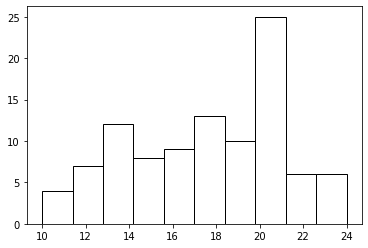

In [4]:
plt.hist(data, bins = 10, facecolor = 'white', edgecolor = 'black');

In [5]:
def nllhood(params, y):
    mu, sigma, delta = params
    lhood = 0.5 * st.norm.pdf(y, mu, sigma) + 0.5 * st.norm.pdf(y, mu + delta, sigma)
    return -np.sum(np.log(lhood))

In [6]:
params = [13, 2, 5]
bounds = [[0, 100], [1, 100], [0, 100]]

In [7]:
fit = scipy.optimize.minimize(nllhood, params, args = data, bounds = bounds)
fit

      fun: 261.4603912203859
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.13686828e-05,  5.68434192e-06,  0.00000000e+00])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 76
      nit: 11
     njev: 19
   status: 0
  success: True
        x: array([14.2931219 ,  1.93564005,  5.95436744])

**B.** Using statistical software that reports the Wald standard error, report the
$95\%$ range of plausible values of $\delta$ , given the data. Can you tell whether there
is a difference between the treatment and control? Can you tell whether the
treatment made the data values generally higher or generally lower?

In [9]:
std_errors = np.sqrt(np.diag(fit.hess_inv.todense()))

In [11]:
wald_table = pd.DataFrame({'MLE': fit.x, 
                           'Std.Errors': std_errors,
                           'LowerBound': fit.x + st.norm.ppf(0.025) * std_errors,
                           'UpperBound': fit.x + st.norm.ppf(0.975) * std_errors},
                          index = ["mu","sigma", "δ"])
                          
print(wald_table)

             MLE  Std.Errors  LowerBound  UpperBound
mu     14.293122    0.362483   13.582667   15.003576
sigma   1.935640    0.175158    1.592337    2.278944
δ       5.954367    0.420109    5.130969    6.777766
